In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib

# 1. Create a synthetic dataset
np.random.seed(42)
n_samples = 1000

# Generating random income, expenses, and debt
income = np.random.normal(50000, 15000, n_samples).clip(10000, 100000)
# Expenses are usually a percentage of income
expense_ratio = np.random.uniform(0.4, 0.9, n_samples)
expenses = income * expense_ratio
debt_ratio = (expenses / income) + np.random.normal(0, 0.1, n_samples)

df = pd.DataFrame({
    'income': income,
    'monthly_expenses': expenses,
    'debt_to_income': debt_ratio.clip(0, 1.5)
})

print("Dataset Created!")
df.head()

Dataset Created!


,income,monthly_expenses,debt_to_income
0,57450.712295,27791.281742,0.452820
1,47926.035482,21676.175206,0.377068
2,59715.328072,42888.451802,0.750133
3,72845.447846,54869.949483,0.887283
4,46487.699379,19329.263354,0.228276


c:\Users\parve\anaconda3\envs\gig_tracker_full\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


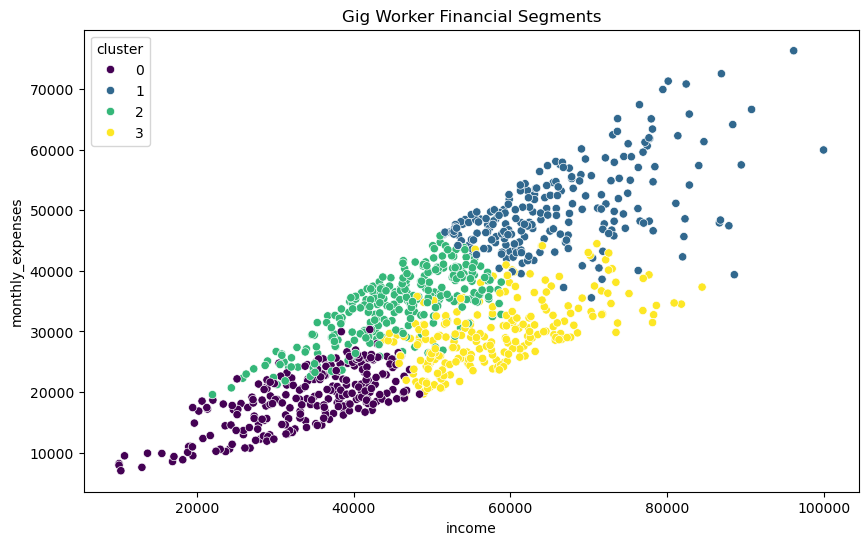

['gig_kmeans_model.pkl']

In [2]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_data)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='monthly_expenses', hue='cluster', palette='viridis')
plt.title('Gig Worker Financial Segments')
plt.show()

# Save these for the Flask API
joblib.dump(scaler, 'gig_scaler.pkl')
joblib.dump(kmeans, 'gig_kmeans_model.pkl')

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Training data for the NLP "Brain"
data = {
    'text': [
        'petrol for honda cb350rs', 'gas station fuel', 'bike service', 
        'zomato lunch', 'swiggy dinner order', 'cafe coffee', 'grocery store',
        'jio fiber recharge', 'electricity bill payment', 'water bill',
        'netflix subscription', 'bgmi uc purchase', 'movie tickets'
    ],
    'category': [
        'Transport', 'Transport', 'Transport',
        'Food', 'Food', 'Food', 'Food',
        'Utilities', 'Utilities', 'Utilities',
        'Entertainment', 'Entertainment', 'Entertainment'
    ]
}

nlp_df = pd.DataFrame(data)

# Vectorize and Train
vectorizer = CountVectorizer()
X_nlp = vectorizer.fit_transform(nlp_df['text'])
nlp_model = MultinomialNB()
nlp_model.fit(X_nlp, nlp_df['category'])

# Save for API
joblib.dump(vectorizer, 'gig_vectorizer.pkl')
joblib.dump(nlp_model, 'gig_nlp_model.pkl')

print("✅ NLP Model and Vectorizer Exported!")

✅ NLP Model and Vectorizer Exported!


In [4]:
# Load the models back
v = joblib.load('gig_vectorizer.pkl')
m = joblib.load('gig_nlp_model.pkl')

def test_ai(input_text):
    test_vec = v.transform([input_text.lower()])
    prediction = m.predict(test_vec)
    return prediction[0]

print(f"Test 1: 'Filled fuel' -> {test_ai('Filled fuel')}")
print(f"Test 2: 'Zomato biryani' -> {test_ai('Zomato biryani')}")

Test 1: 'Filled fuel' -> Transport
Test 2: 'Zomato biryani' -> Food
